In [53]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm.notebook import tqdm

from ML2_lib import loss
from ML2_lib import noise
from ML2_lib import algo_sgd
from  ML2_lib import merge


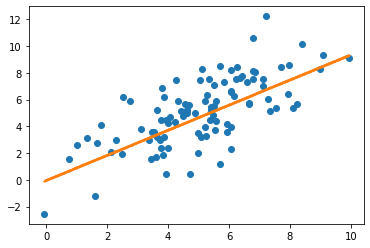

In [54]:
# データ生成デモ Gauss
X_mean = 5
X_var = 2
w_star = 1
rng = np.random.default_rng()
X = rng.normal(loc=X_mean,size=100,scale=X_var)
E = noise.Gauss(sigma=2.2,dim=X.shape[0],n=1).generate()
Y = E + np.dot(w_star,X)

a = loss.LinearQuadraticLoss()

data = [X,Y]
core = algo_sgd.SGD(w_init=0,a=0.001,t_max=99,data=data)
for _ in core:
    core.update(a)

x_m = np.linspace(X.min(),X.max(),1000)
y_m = a.predict(x_m,core.w)
plt.scatter(X,Y)
plt.scatter(x_m,y_m,s=1)
plt.show()



In [55]:
# d = 1 、E ~ 正規分布
trial_num = 100 #試行回数
result_gauss = [] #パラメータの最終結果　トライアル数*分割数k*特徴量次元
result_loss_gauss = [] # 過剰期待損失の最終結果　トライアル数*分割数k
valid_k = 100 # 分割数　1 ~ valid_k

X_mean = 5
X_var = 2
w_star = 1
a = 0.01 # 学習率
c = 5 # wの初期値がとりうる範囲
n = 250 # データセットのサンプル数
b = 2.2 # ノイズの分散

for _ in tqdm(range(trial_num)):
    w_trial = [] # モデルを貯めていく、必要かどうか
    loss_store = [] # 過剰期待損失を貯めていく

    # 初期値wの決定
    w = rng.uniform(w_star-c,w_star+c)
    for k in range(1,valid_k+1):
        core_store = []
        model_store = []



        son = loss.LinearQuadraticLoss()
        for i in range(k):
            core_num = n // k
            rng = np.random.default_rng()
            X = rng.normal(loc=X_mean,size=core_num,scale=X_var)
            E = noise.Gauss(sigma=b,dim=X.shape[0],n=1).generate()
            Y = E + np.dot(w_star,X)
            data = [X,Y]

            core = algo_sgd.SGD(w_init=w,a=a,t_max=core_num-1,data=data)
            for _ in core:
                core.update(son)
            core_store.append(core)
            model_store.append(core.w)

        model_store = np.array(model_store)
        model_store = model_store.reshape([-1,1])

        w_dc = merge.smallball(model_store)
        w_trial.append(w_dc)
        # 過剰期待損失　E[(<(w-w^*),X>)^2]　Xが正規分布の場合　E[X^2] = X_mean^2 + X_var^2 * 単位行列
        E_X = np.diag(np.ones(w_dc.shape[0])* (X_var**2)  + (X_mean**2))
        excess_risk = np.dot(np.dot(E_X,w_dc),w_dc) + np.dot(np.dot(E_X,w_star),w_star) - 2 * np.dot(np.dot(E_X,w_star),w_dc)
        loss_store.append(excess_risk[0][0])
    result_gauss.append(np.array(w_trial))
    result_loss_gauss.append(np.array(loss_store))

result_gauss = np.array(result_gauss)
result_loss_gauss = np.array(result_loss_gauss)





  0%|          | 0/100 [00:00<?, ?it/s]

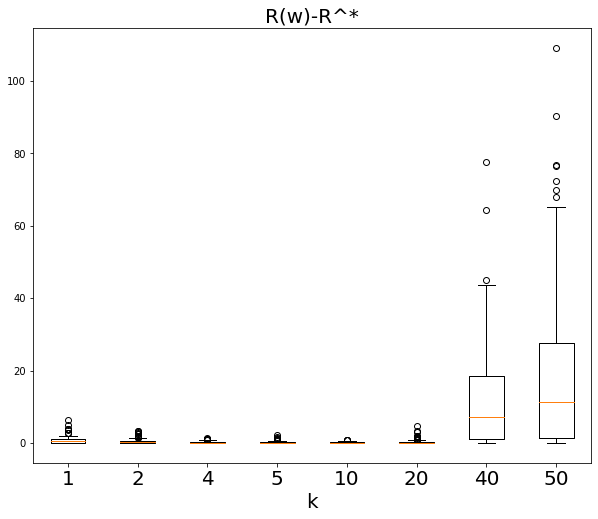

In [56]:
fdic = {
    "size" : 20,
}

columns=['1', '2', '4','5','10','20','40','50']
fig = plt.figure(figsize=(10.0, 8.0))
ax1 = fig.add_subplot(111)

bp1 = ax1.boxplot(result_loss_gauss[:,[0,1,3,4,9,19,39,49]])
ax1.set_xticklabels(columns,fontsize=20)
ax1.set_title('R(w)-R^*',fontsize=20)
ax1.set_xlabel('k',fontdict=fdic)

plt.show()

In [57]:
df = pd.DataFrame(result_loss_gauss[:,[0,1,3,4,9,19,39,49]],columns=columns)
df.describe()

,1,2,4,5,10,20,40,50
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.844318,0.531405,0.228652,0.244749,0.185334,0.392312,12.667885,19.374989
std,1.157523,0.771894,0.302836,0.378598,0.210798,0.735114,15.159183,23.145258
min,0.000061,0.000063,0.000012,0.000010,0.000011,0.000010,0.000213,0.000349
25%,0.080767,0.049453,0.030396,0.022920,0.020911,0.031517,1.065801,1.384380
50%,0.432920,0.198213,0.096719,0.109860,0.108079,0.096714,7.089012,11.222712
75%,1.101212,0.601655,0.318413,0.305387,0.290719,0.348507,18.580451,27.583505
max,6.282121,3.377459,1.373139,2.289707,0.882818,4.574757,77.731932,109.198497


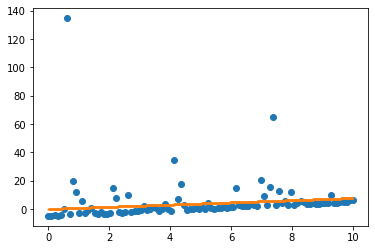

In [58]:
X = rng.normal(loc=X_mean,size=100,scale=X_var)
E = noise.LogNormal(sigma=1.75,dim=X.shape[0],n=1).generate()
Y = E + np.dot(w_star,X)


a = loss.LinearQuadraticLoss()

data = [X,Y]
core = algo_sgd.SGD(w_init=0,a=0.001,t_max=99,data=data)
for _ in core:
    core.update(a)



x_m = np.linspace(0,10,1000)
y_m = a.predict(x_m,core.w)
plt.scatter(X,Y)
plt.scatter(x_m,y_m,s=1)



In [59]:
trial_num = 100 #試行回数
result_lognormal = [] #パラメータの最終結果　トライアル数*分割数k*特徴量次元
result_loss_lognormal = [] # 過剰期待損失の最終結果　トライアル数*分割数k
valid_k = 100 # 分割数　1 ~ valid_k

w_star = 1
X_mean = 5
X_var = 2

a = 0.01
c = 5
n = 250
b = 1.75
for _ in tqdm(range(trial_num)):
    w_trial = []
    loss_store = []
    # 初期値wの決定
    rng = np.random.default_rng()
    w = rng.uniform(w_star-c,w_star+c)
    for k in range(1,valid_k+1):
        core_store = []
        model_store = []


        son = loss.LinearQuadraticLoss()
        for _ in range(k):
            core_num = n // k
            rng = np.random.default_rng()
            X = rng.normal(loc=X_mean,size=core_num,scale=X_var)
            E = noise.LogNormal(sigma=b,dim=X.shape[0],n=1).generate()
            Y = E + np.dot(w_star,X)
            data = [X,Y]
            core = algo_sgd.SGD(w_init=w,a=a,t_max=core_num-1,data=data)
            for _ in core:
                core.update(son)
            core_store.append(core)
            model_store.append(core.w)

        model_store = np.array(model_store)
        model_store = model_store.reshape([-1,1])
        w_dc = merge.smallball(model_store)
        w_trial.append(w_dc)
        E_X = np.diag(np.ones(w_dc.shape[0])* (X_var**2)  + (X_mean**2))
        excess_risk = np.dot(np.dot(E_X,w_dc),w_dc) + np.dot(np.dot(E_X,w_star),w_star) - 2 * np.dot(np.dot(E_X,w_star),w_dc)
        loss_store.append(excess_risk[0][0])

    result_lognormal.append(np.array(w_trial))
    result_loss_lognormal.append(np.array(loss_store))

result_lognormal = np.array(result_lognormal)
result_loss_lognormal = np.array(result_loss_lognormal)





  0%|          | 0/100 [00:00<?, ?it/s]

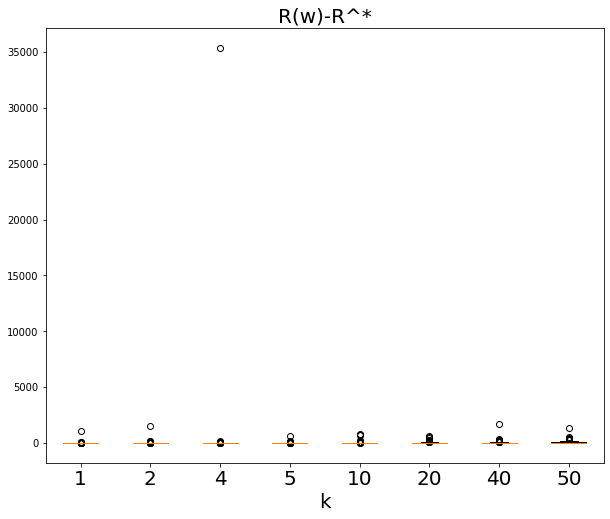

In [64]:
fig = plt.figure(figsize=(10.0, 8.0))
ax1 = fig.add_subplot(111)

bp1 = ax1.boxplot(result_loss_lognormal[:,[0,1,3,4,9,19,39,49]])
ax1.set_xticklabels(columns,fontsize=20)
ax1.set_title('R(w)-R^*',fontsize=20)
ax1.set_xlabel('k',fontdict=fdic)

plt.show()

In [65]:
df = pd.DataFrame(result_loss_lognormal[:,[0,1,3,4,9,19,39,49]],columns=columns)

In [66]:
df.describe()





,1,2,4,5,10,20,40,50
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,19.257400,25.990138,361.969053,18.384717,37.314786,45.911016,52.753340,91.176634
std,109.276679,152.953004,3538.125608,65.121138,126.760633,102.224728,178.674421,169.300347
min,0.000091,0.001949,0.002069,0.002574,0.000585,0.000035,0.005993,0.000127
25%,1.682920,0.639546,0.604138,0.735384,0.790018,2.065871,3.506832,7.963516
50%,4.782484,2.501437,2.406790,2.973778,4.319416,9.088337,15.455175,33.770033
75%,9.735044,9.374404,7.440473,10.968343,14.355253,41.722412,38.433709,102.885108
max,1095.618773,1518.208808,35388.754607,609.000885,774.894946,609.331318,1727.939740,1336.680006


In [63]:

w_trial

[array([0.61499771]),
 array([0.70250054]),
 array([3.9140287]),
 array([1.1955446]),
 array([0.94146939]),
 array([0.74248803]),
 array([2.33984969]),
 array([1.89481827]),
 array([0.73883818]),
 array([0.92332577]),
 array([1.30035223]),
 array([1.57154355]),
 array([0.77493015]),
 array([0.4707413]),
 array([0.47580754]),
 array([3.71339704]),
 array([1.52551058]),
 array([0.96750103]),
 array([4.36740222]),
 array([0.00667206]),
 array([0.36452118]),
 array([0.00856919]),
 array([1.12228503]),
 array([1.50690293]),
 array([0.67577116]),
 array([1.58084989]),
 array([1.36460506]),
 array([0.85113533]),
 array([1.01077653]),
 array([1.55101622]),
 array([1.10274101]),
 array([0.99643536]),
 array([3.28999838]),
 array([1.59246148]),
 array([1.37364411]),
 array([2.31327889]),
 array([1.68830762]),
 array([1.59082639]),
 array([1.66429369]),
 array([1.47114269]),
 array([0.42057894]),
 array([6.05748224]),
 array([-0.26910996]),
 array([1.4144228]),
 array([2.1029578]),
 array([1.8985